# AI PROJECT PANEL PV by SERRAI SIHEM CHOUROUK 

# L'explication du mini projet 

### Table of Contents

#### Prepare Data Set
* Load Python Packages
* Load and Prepare Data Set

#### Data Quality Assessment
* Check Missing Values
* Drop the useless columns and rows 
* Check Duplicated Values

#### Exploratory Data Analysis and Feature Engineering
* Data Alysis and Data Viz 

#### Building Models - Predicting angle and power production 
* Prepare Data for Models
* Applying Machine Learning Models
* angle and power production Prediction

####  Conclusion 
* How to maximize in  short term / the long term?


## Data collection:  


### The meteorological data…

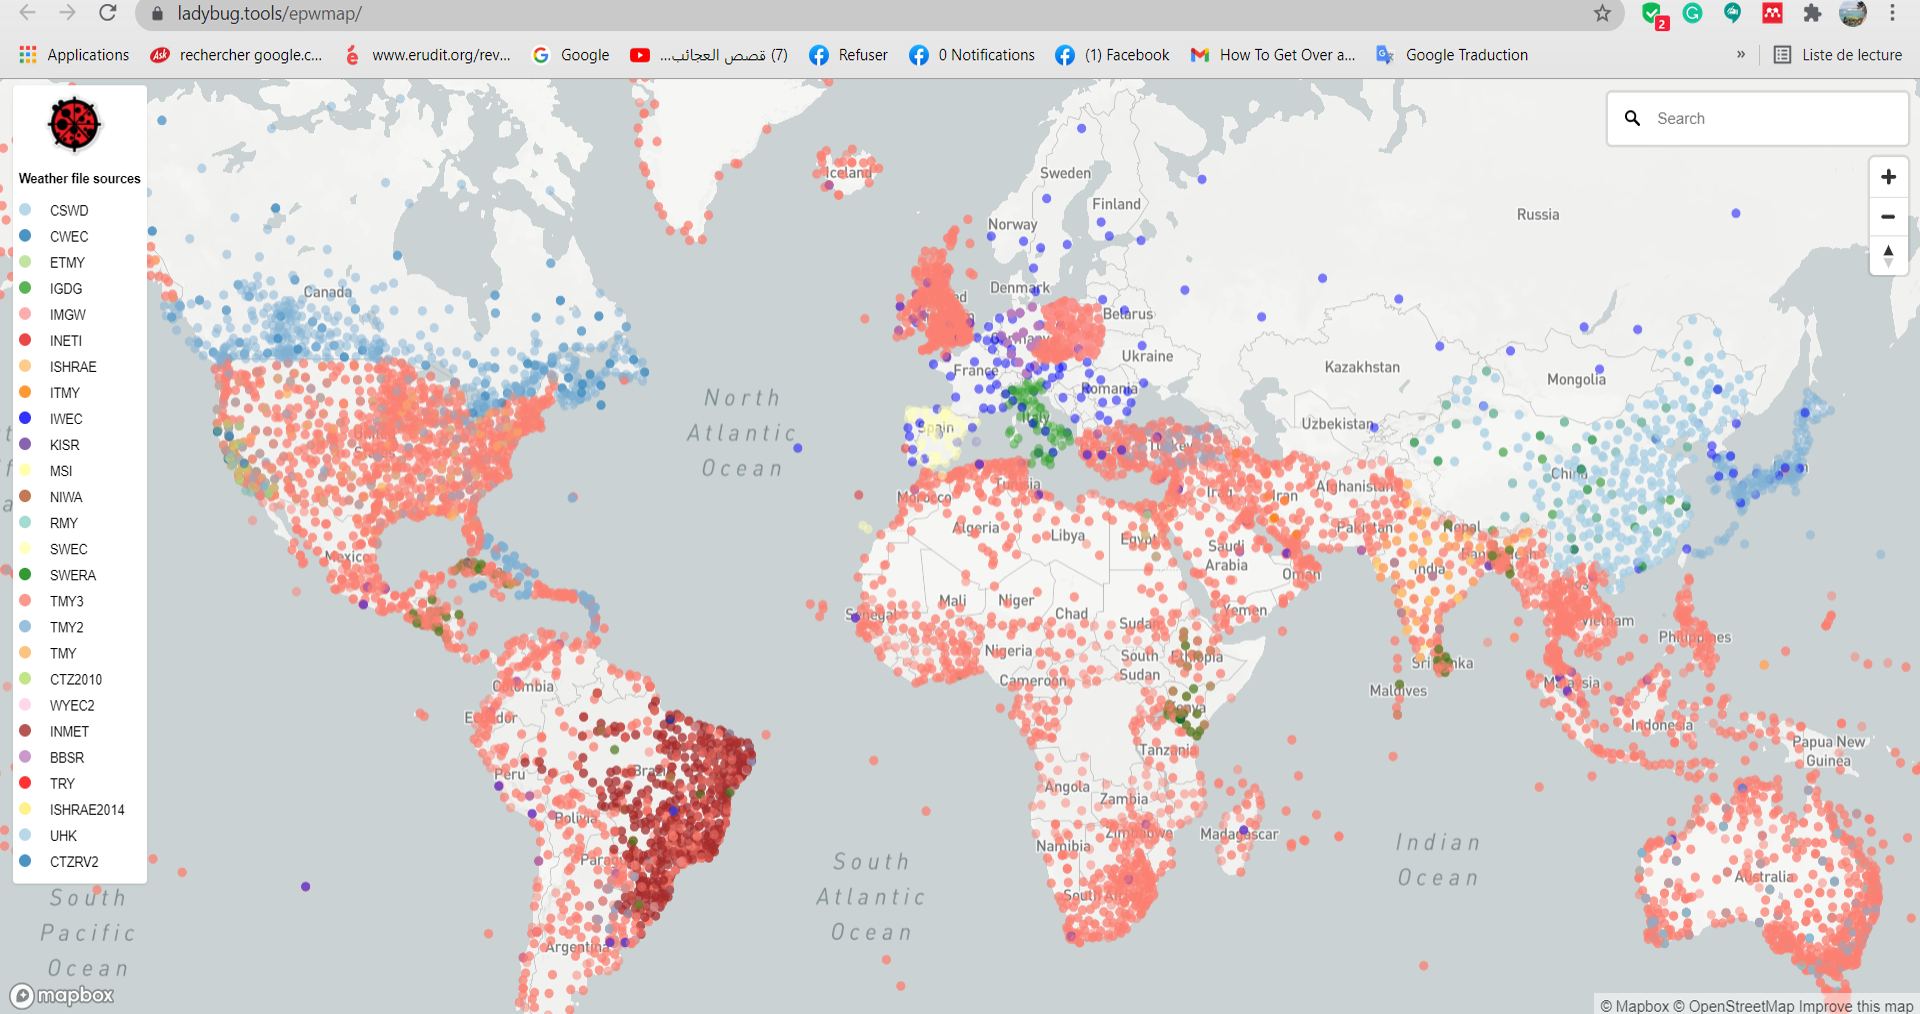

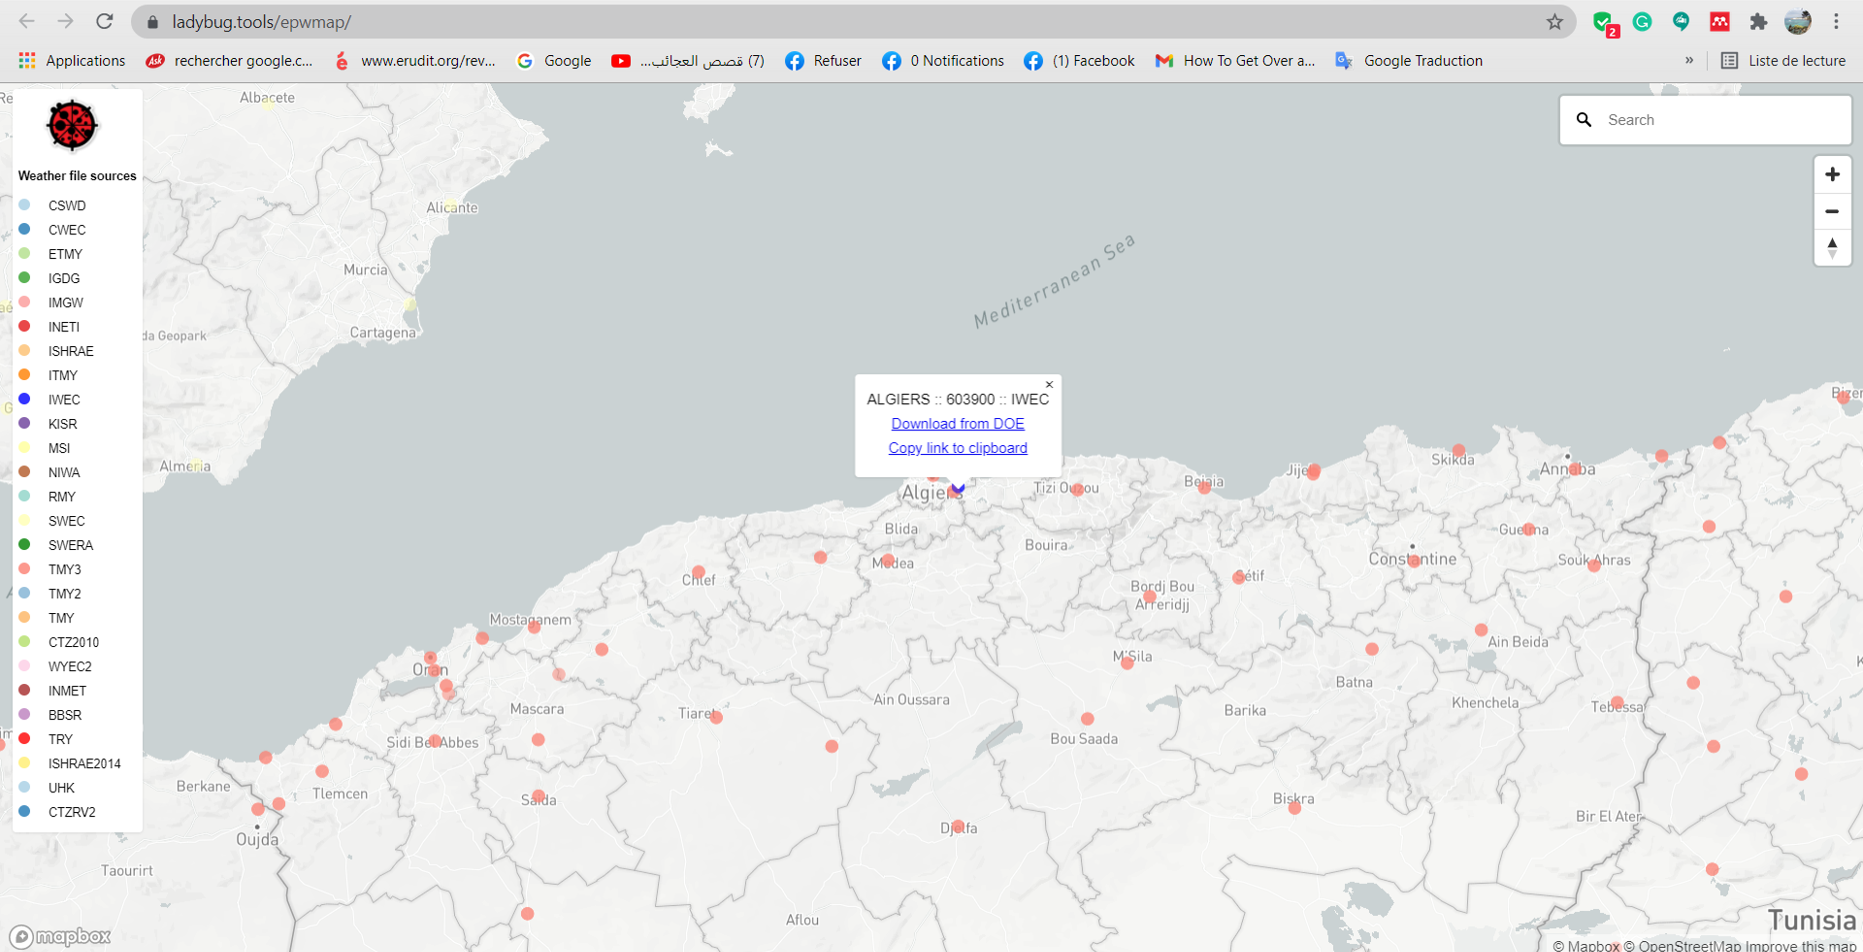

### The solar power generation data _ The meteorological data with Grasshopper -  LADYBUG RHINO 7 

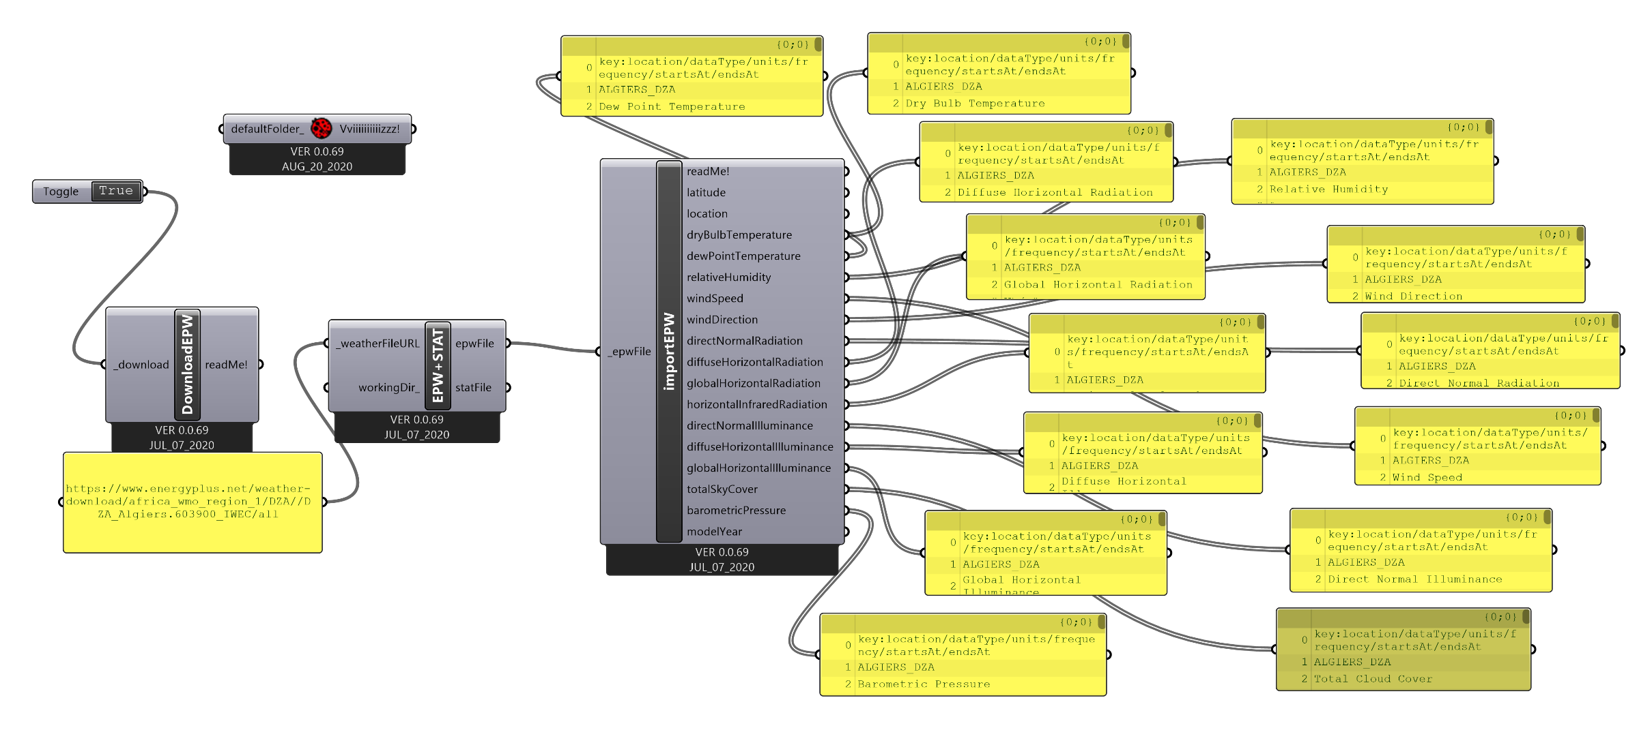

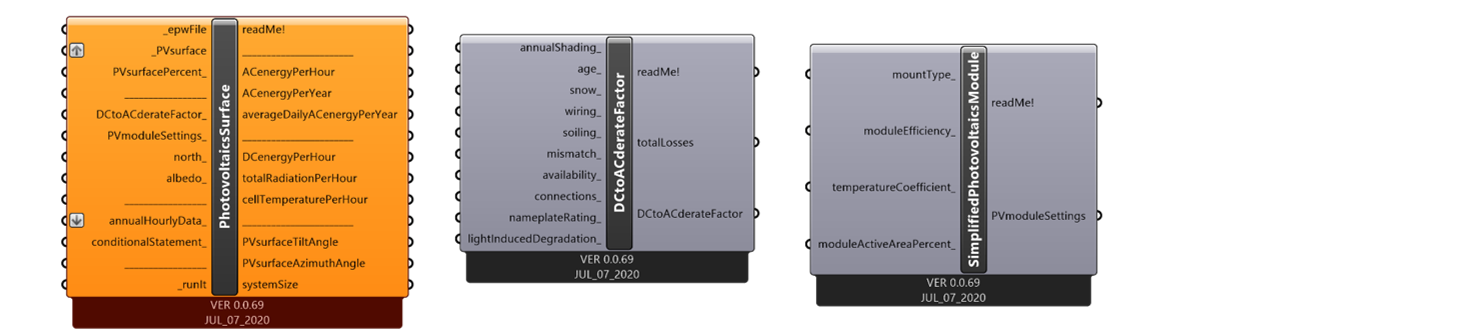

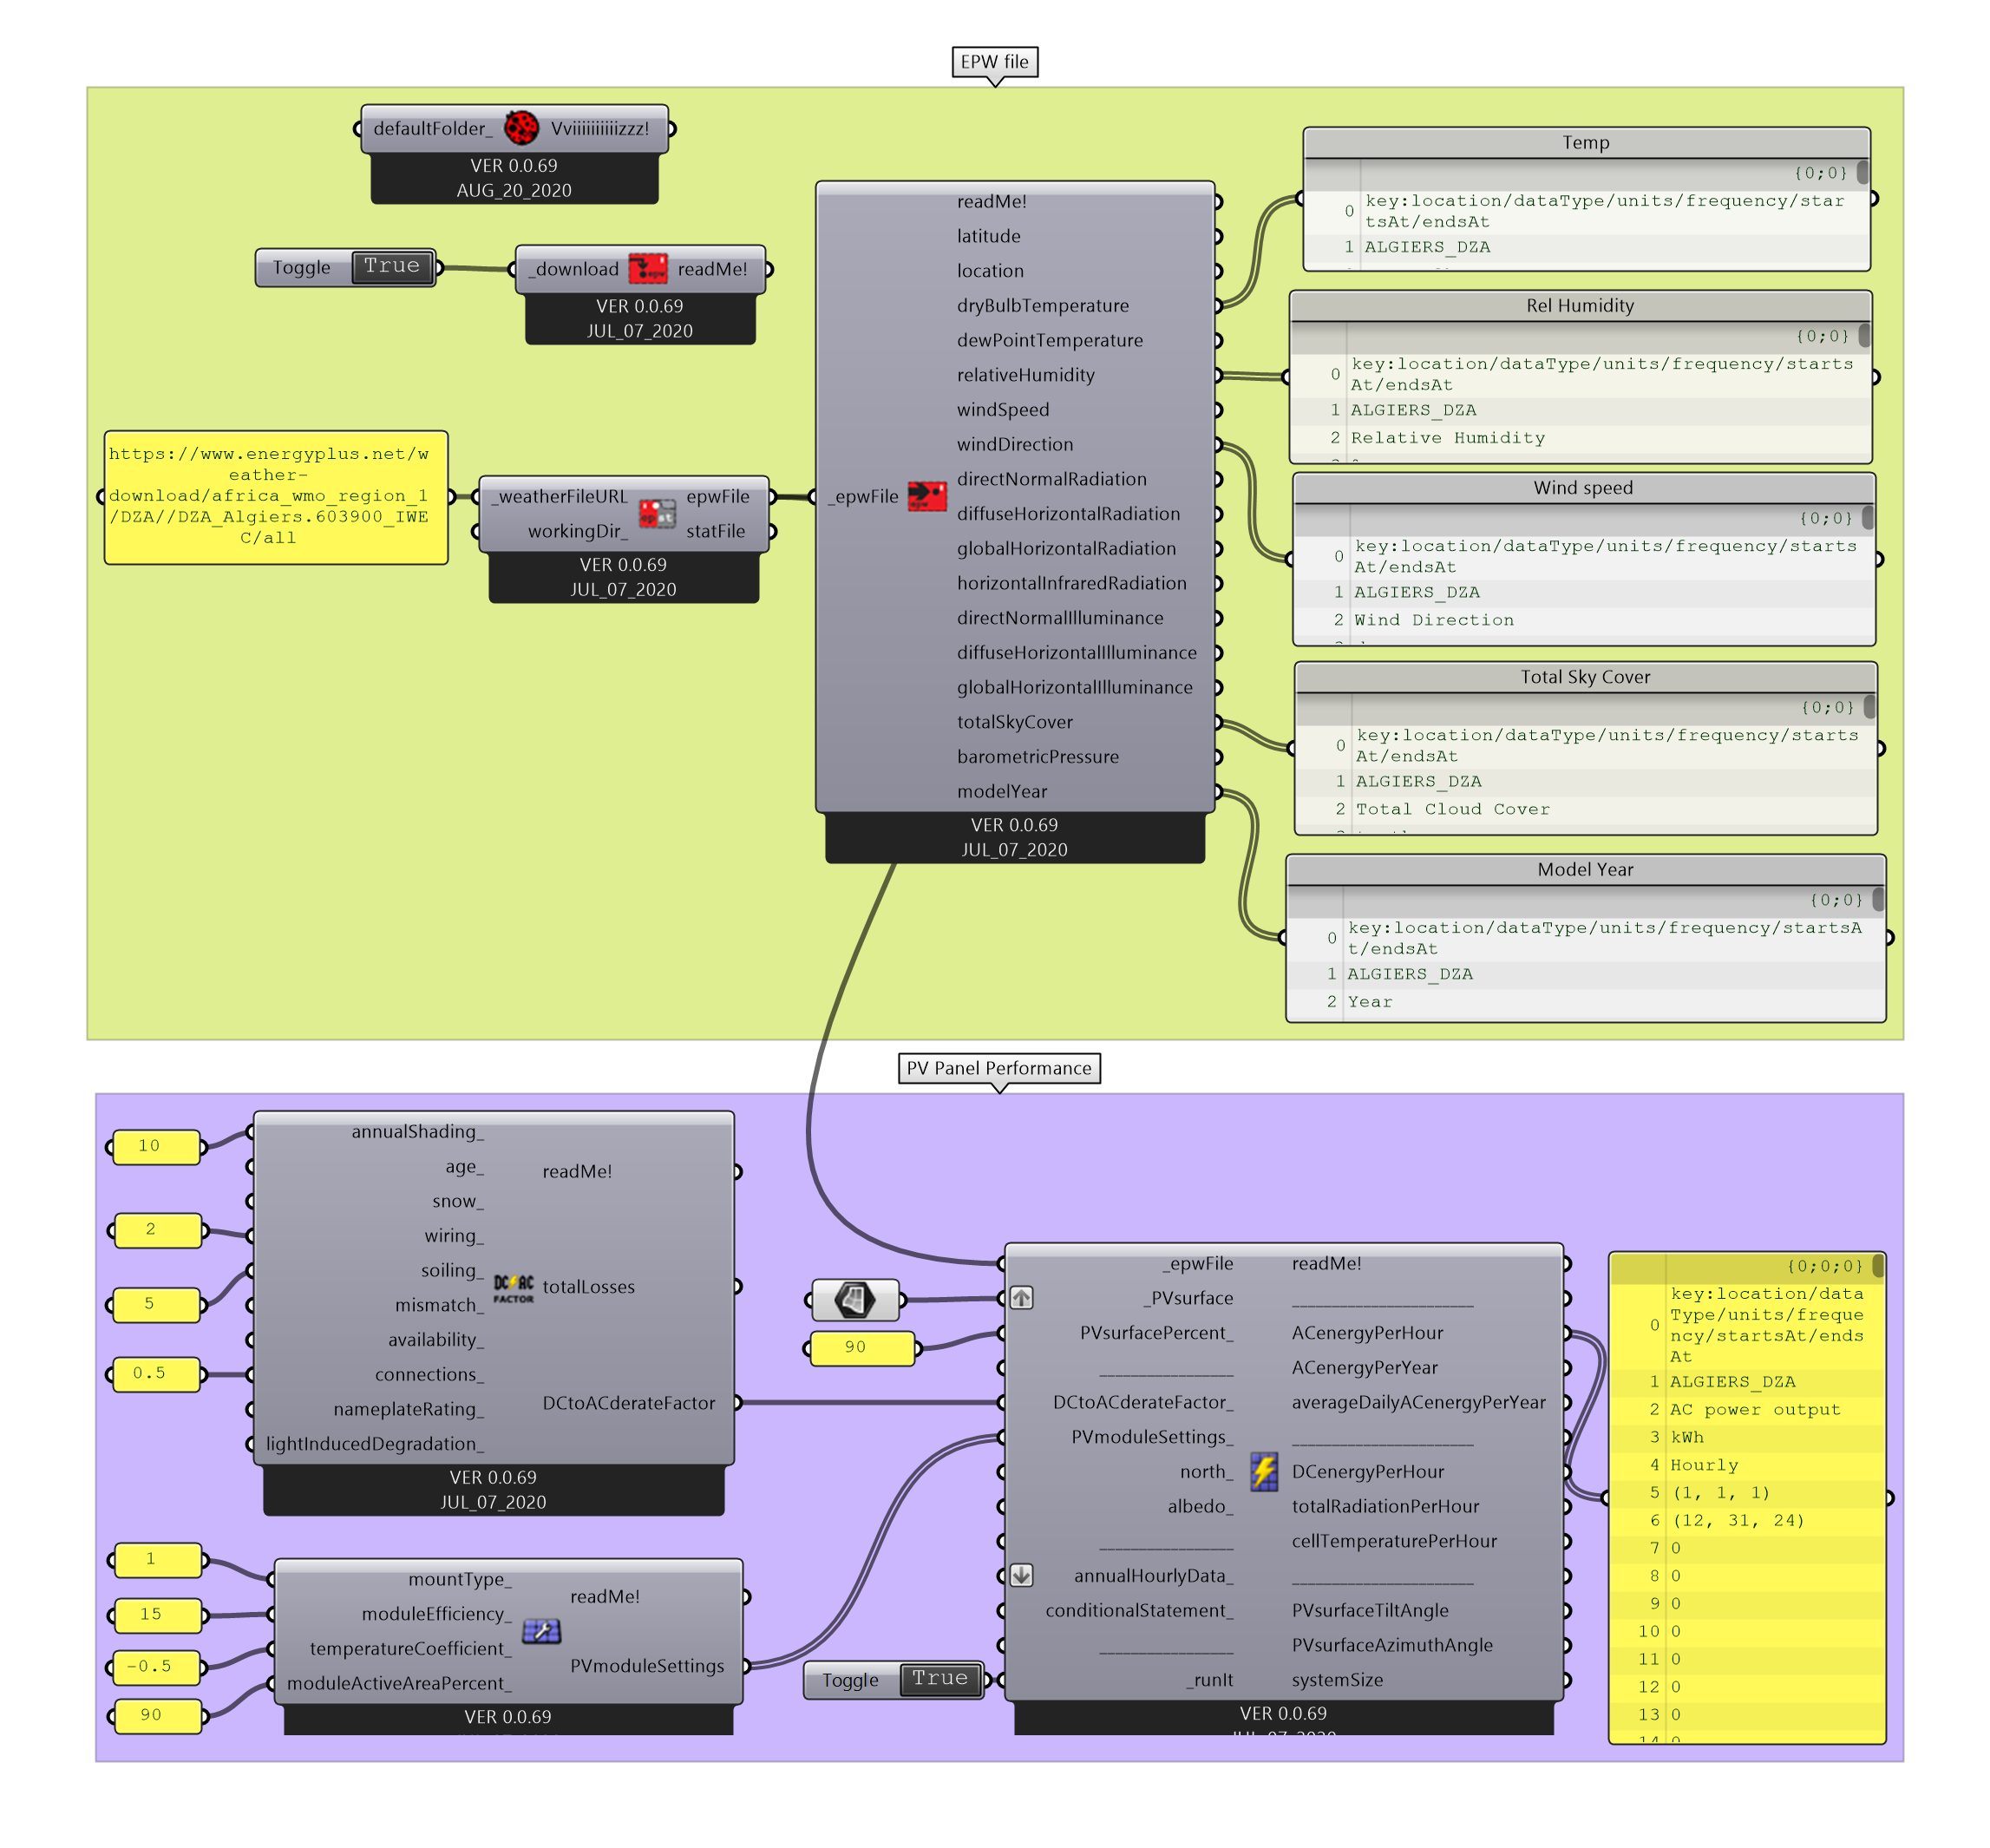

## The panel PV 

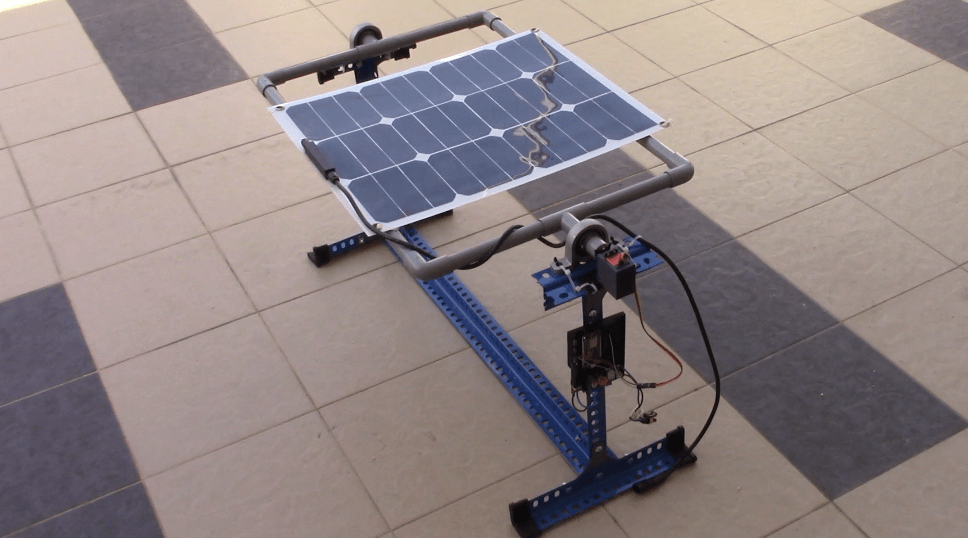

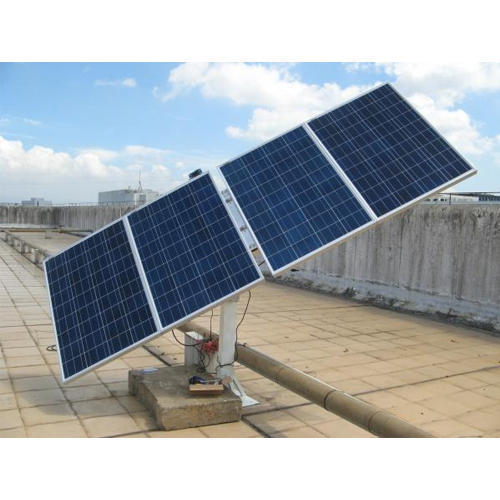

## Methodology using the Literary Review  

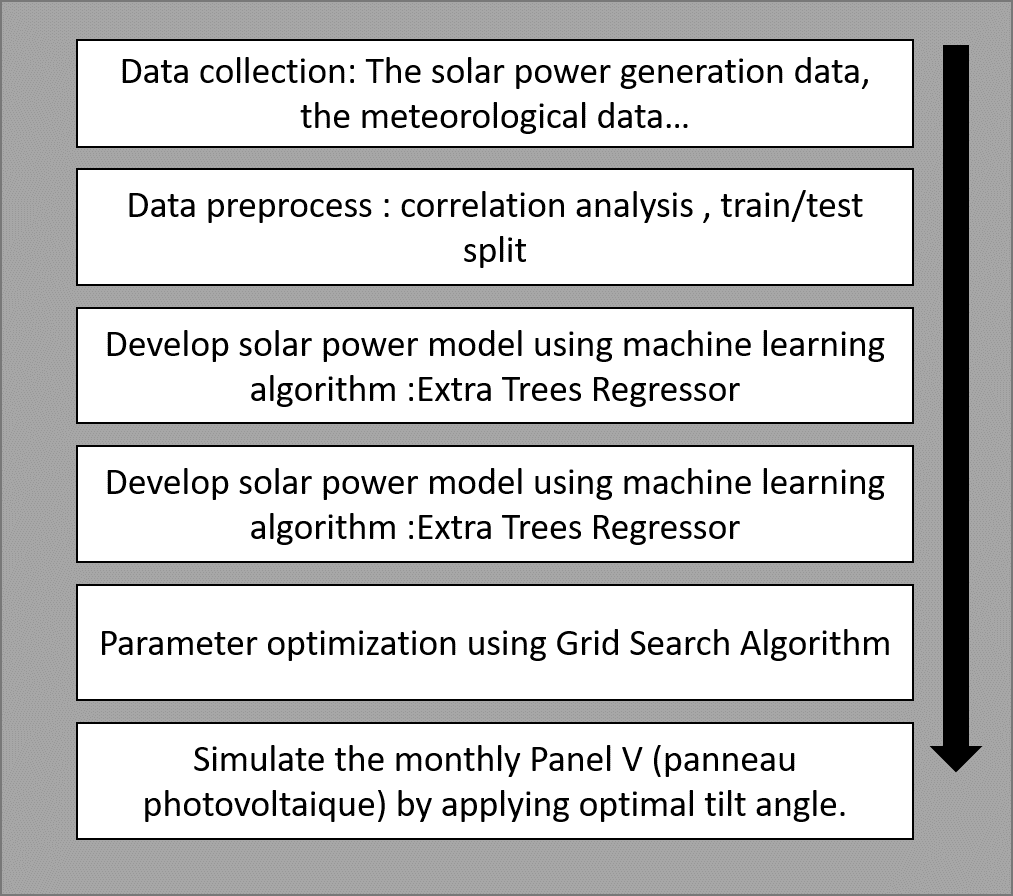

### Library and packages 

In [61]:
import pandas as pd
import numpy as np
from pandas import DataFrame,Series
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import datetime as dt
import seaborn as sns 
import matplotlib.pyplot as plt
import missingno
import sklearn
import xgboost
import lightgbm
import catboost
import pycaret

from pycaret.regression import *
import seaborn as sns; sns.set_style("whitegrid")
from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.linear_model import BayesianRidge, ElasticNetCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


### Load and Prepare Data Set

In [62]:
panelPV_file = "Solar_panel_3_Google"
panelPV_data = pd.read_csv("Solar_panel_3_Google.csv", sep=',')
panelPV_data

Houre  Day     Month  saison  angle (°)  production / wh  \
0           1    1   January  Winter          0              0.0   
1           2    1   January  Winter          0              0.0   
2           3    1   January  Winter          0              0.0   
3           4    1   January  Winter          0              0.0   
4           5    1   January  Winter          0              0.0   
...       ...  ...       ...     ...        ...              ...   
148915     20   31  December  Winter        -80              0.0   
148916     21   31  December  Winter        -80              0.0   
148917     22   31  December  Winter        -80              0.0   
148918     23   31  December  Winter        -80              0.0   
148919     24   31  December  Winter        -80              0.0   

        Dry Bulb Temperature (c)  Humidity (%)  Wind Direction (°)  \
0                            8.3            73                 280   
1                            9.9            69                 280   
2                           10.9            66                 280   
3                           11.2            66                 260   
4                           11.1            67                 260   
...                          ...           ...                 ...   
148915                       5.1            90                   0   
148916                       4.3            91                   0   
148917                       4.1            91                   0   
148918                       4.9            86                   0   
148919                       6.4            80                   0   

        Cloud Cover (tenth)  D- N-Radiation (Wh/m2)  \
0                         1                       0   
1                         0                       0   
2                         1                       0   
3                         6                       0   
4                         7                       0   
...                     ...                     ...   
148915                    2                       0   
148916                    2                       0   
148917                    2                       0   
148918                    2                       0   
148919                    2                       0   

        Dif- H- Radiation ( Wh/m2)  G- H- Radiation (Wh/m2)  \
0                                0                        0   
1                                0                        0   
2                                0                        0   
3                                0                        0   
4                                0                        0   
...                            ...                      ...   
148915                           0                        0   
148916                           0                        0   
148917                           0                        0   
148918                           0                        0   
148919                           0                        0   

        H-I- Radiation Intensity (Wh/m2)  Pressure (Pa)  \
0                                    318         100800   
1                                    320         100800   
2                                    320         100900   
3                                    317         101000   
4                                    321         101000   
...                                  ...            ...   
148915                               276         102300   
148916                               272         102300   
148917                               271         102300   
148918                               275         102300   
148919                               281         102300   

        G-H- Illuminance (lux)  D-H- Illuminance (lux)  \
0                            0                       0   
1                            0                       0   
2                            0                   

### Data Quality Assessment

In [63]:
# Check Missing Values
panelPV_data.info()
panelPV_data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148920 entries, 0 to 148919
Data columns (total 20 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Houre                             148920 non-null  int64  
 1   Day                               148920 non-null  int64  
 2   Month                             148920 non-null  object 
 3   saison                            148920 non-null  object 
 4   angle (°)                         148920 non-null  int64  
 5   production / wh                   148920 non-null  float64
 6   Dry Bulb Temperature (c)          148920 non-null  float64
 7   Humidity (%)                      148920 non-null  int64  
 8   Wind Direction (°)                148920 non-null  int64  
 9   Cloud Cover (tenth)               148920 non-null  int64  
 10  D- N-Radiation (Wh/m2)            148920 non-null  int64  
 11  Dif- H- Radiation ( Wh/m2)        148920 non-null  i

Houre                               0
Day                                 0
Month                               0
saison                              0
angle (°)                           0
production / wh                     0
Dry Bulb Temperature (c)            0
Humidity (%)                        0
Wind Direction (°)                  0
Cloud Cover (tenth)                 0
D- N-Radiation (Wh/m2)              0
Dif- H- Radiation ( Wh/m2)          0
G- H- Radiation (Wh/m2)             0
H-I- Radiation Intensity (Wh/m2)    0
Pressure (Pa)                       0
G-H- Illuminance (lux)              0
D-H- Illuminance (lux)              0
D- N- Illuminance (lux)             0
Wind Speed (m/s)                    0
D- P- Temperature ©                 0
dtype: int64

In [64]:
# check if data set contains duplicated records
print(panelPV_data.duplicated().sum())

0


There is no duplicated appointments record in this data set. The data is clean

## Useless data to drop

In [65]:
## correlation map - before droping the useless columns, we must check in the correlation between Production and the rest of data

In [66]:
panelPV_data

Houre  Day     Month  saison  angle (°)  production / wh  \
0           1    1   January  Winter          0              0.0   
1           2    1   January  Winter          0              0.0   
2           3    1   January  Winter          0              0.0   
3           4    1   January  Winter          0              0.0   
4           5    1   January  Winter          0              0.0   
...       ...  ...       ...     ...        ...              ...   
148915     20   31  December  Winter        -80              0.0   
148916     21   31  December  Winter        -80              0.0   
148917     22   31  December  Winter        -80              0.0   
148918     23   31  December  Winter        -80              0.0   
148919     24   31  December  Winter        -80              0.0   

        Dry Bulb Temperature (c)  Humidity (%)  Wind Direction (°)  \
0                            8.3            73                 280   
1                            9.9            69                 280   
2                           10.9            66                 280   
3                           11.2            66                 260   
4                           11.1            67                 260   
...                          ...           ...                 ...   
148915                       5.1            90                   0   
148916                       4.3            91                   0   
148917                       4.1            91                   0   
148918                       4.9            86                   0   
148919                       6.4            80                   0   

        Cloud Cover (tenth)  D- N-Radiation (Wh/m2)  \
0                         1                       0   
1                         0                       0   
2                         1                       0   
3                         6                       0   
4                         7                       0   
...                     ...                     ...   
148915                    2                       0   
148916                    2                       0   
148917                    2                       0   
148918                    2                       0   
148919                    2                       0   

        Dif- H- Radiation ( Wh/m2)  G- H- Radiation (Wh/m2)  \
0                                0                        0   
1                                0                        0   
2                                0                        0   
3                                0                        0   
4                                0                        0   
...                            ...                      ...   
148915                           0                        0   
148916                           0                        0   
148917                           0                        0   
148918                           0                        0   
148919                           0                        0   

        H-I- Radiation Intensity (Wh/m2)  Pressure (Pa)  \
0                                    318         100800   
1                                    320         100800   
2                                    320         100900   
3                                    317         101000   
4                                    321         101000   
...                                  ...            ...   
148915                               276         102300   
148916                               272         102300   
148917                               271         102300   
148918                               275         102300   
148919                               281         102300   

        G-H- Illuminance (lux)  D-H- Illuminance (lux)  \
0                            0                       0   
1                            0                       0   
2                            0                   

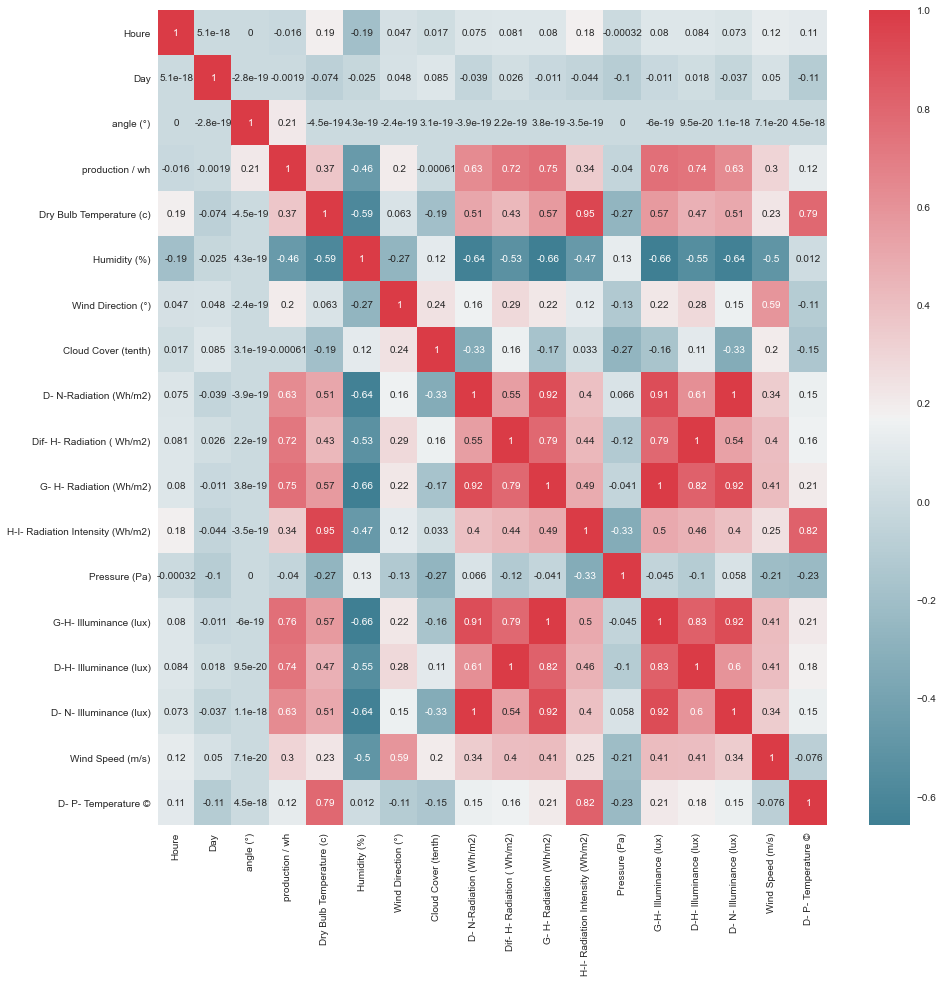

In [67]:
def correlation_heatmap(df1):
    _,ax=plt.subplots(figsize=(15,15))
    colormap=sns.diverging_palette(220,10,as_cmap=True)
    sns.heatmap(panelPV_data.corr(),annot=True,cmap=colormap)
    
correlation_heatmap(panelPV_data)

In [68]:
# data_drop = ["Pressure (Pa)","D- P- Temperature © "] 
# list of all columns that i need to drop ie that do not have any role to play in predicting the best angle to max production 

In [69]:
data_drop = ["Pressure (Pa)", "D- P- Temperature ©"] 
panelPV_data= panelPV_data.drop(data_drop,axis = 1)

In [70]:
panelPV_data.head()

Houre  Day    Month  saison  angle (°)  production / wh  \
0      1    1  January  Winter          0              0.0   
1      2    1  January  Winter          0              0.0   
2      3    1  January  Winter          0              0.0   
3      4    1  January  Winter          0              0.0   
4      5    1  January  Winter          0              0.0   

   Dry Bulb Temperature (c)  Humidity (%)  Wind Direction (°)  \
0                       8.3            73                 280   
1                       9.9            69                 280   
2                      10.9            66                 280   
3                      11.2            66                 260   
4                      11.1            67                 260   

   Cloud Cover (tenth)  D- N-Radiation (Wh/m2)  Dif- H- Radiation ( Wh/m2)  \
0                    1                       0                           0   
1                    0                       0                           0   
2                    1                       0                           0   
3                    6                       0                           0   
4                    7                       0                           0   

   G- H- Radiation (Wh/m2)  H-I- Radiation Intensity (Wh/m2)  \
0                        0                               318   
1                        0                               320   
2                        0                               320   
3                        0                               317   
4                        0                               321   

   G-H- Illuminance (lux)  D-H- Illuminance (lux)  D- N- Illuminance (lux)  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   
3                       0                       0                        0   
4                       0                       0                        0   

   Wind Speed (m/s)  
0              10.3  
1               9.3  
2               8.2  
3               7.2  
4               8.2

In [71]:
# drop rows with 0 production 

In [72]:
 drop_0_production =panelPV_data.index[panelPV_data["production / wh"] == 0].tolist()
 panelPV_data =panelPV_data.drop(panelPV_data.index[drop_0_production])

In [73]:
panelPV_data

Houre  Day     Month  saison  angle (°)  production / wh  \
8           9    1   January  Winter          0             24.8   
9          10    1   January  Winter          0             50.4   
10         11    1   January  Winter          0             64.3   
11         12    1   January  Winter          0             76.2   
12         13    1   January  Winter          0             57.2   
...       ...  ...       ...     ...        ...              ...   
148907     12   31  December  Winter        -80              2.1   
148908     13   31  December  Winter        -80              1.9   
148909     14   31  December  Winter        -80              1.5   
148910     15   31  December  Winter        -80              0.8   
148911     16   31  December  Winter        -80              0.1   

        Dry Bulb Temperature (c)  Humidity (%)  Wind Direction (°)  \
8                           10.9            75                 280   
9                           10.8            78                 200   
10                          12.6            72                 200   
11                          14.3            67                 200   
12                          16.1            62                 260   
...                          ...           ...                 ...   
148907                       7.0            87                   0   
148908                       9.0            79                   0   
148909                      11.0            62                   0   
148910                      12.0            62                   0   
148911                      12.0            59                   0   

        Cloud Cover (tenth)  D- N-Radiation (Wh/m2)  \
8                         9                       0   
9                         9                      55   
10                        8                     110   
11                        7                     167   
12                        7                     224   
...                     ...                     ...   
148907                    9                      57   
148908                    9                      59   
148909                    9                      59   
148910                    9                      54   
148911                    6                     281   

        Dif- H- Radiation ( Wh/m2)  G- H- Radiation (Wh/m2)  \
8                               19                       19   
9                               87                      100   
10                             163                      203   
11                             218                      294   
12                             240                      353   
...                            ...                      ...   
148907                         221                      247   
148908                         247                      276   
148909                         241                      271   
148910                         205                      229   
148911                         143                      236   

        H-I- Radiation Intensity (Wh/m2)  G-H- Illuminance (lux)  \
8                                    315                    2100   
9                                    313                   11100   
10                                   319                   22200   
11                                   327                   32200   
12                                   333                   38600   
...                                  ...                     ...   
148907                               302                   27400   
148908                               312                   30600   
148909                               315                   29900   
148910                               316                   25300   
148911                               309                   24900   

        D-H- Illuminance (lux)  D- N- Illuminance (lux)  Wind Speed (m/s)  
8                         2100         

## Exploratory Data Analysis and Feature Engineering

In [74]:
panelPV_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68058 entries, 8 to 148911
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Houre                             68058 non-null  int64  
 1   Day                               68058 non-null  int64  
 2   Month                             68058 non-null  object 
 3   saison                            68058 non-null  object 
 4   angle (°)                         68058 non-null  int64  
 5   production / wh                   68058 non-null  float64
 6   Dry Bulb Temperature (c)          68058 non-null  float64
 7   Humidity (%)                      68058 non-null  int64  
 8   Wind Direction (°)                68058 non-null  int64  
 9   Cloud Cover (tenth)               68058 non-null  int64  
 10  D- N-Radiation (Wh/m2)            68058 non-null  int64  
 11  Dif- H- Radiation ( Wh/m2)        68058 non-null  int64  
 12  G- 

In [75]:
panelPV_data.groupby(['angle (°)','production / wh']).size()

angle (°)  production / wh
-80        0.1                101
           0.2                 76
           0.3                 52
           0.4                 38
           0.5                 30
                             ... 
 80        140.7                1
           143.0                1
           143.6                1
           144.4                1
           144.7                1
Length: 19391, dtype: int64

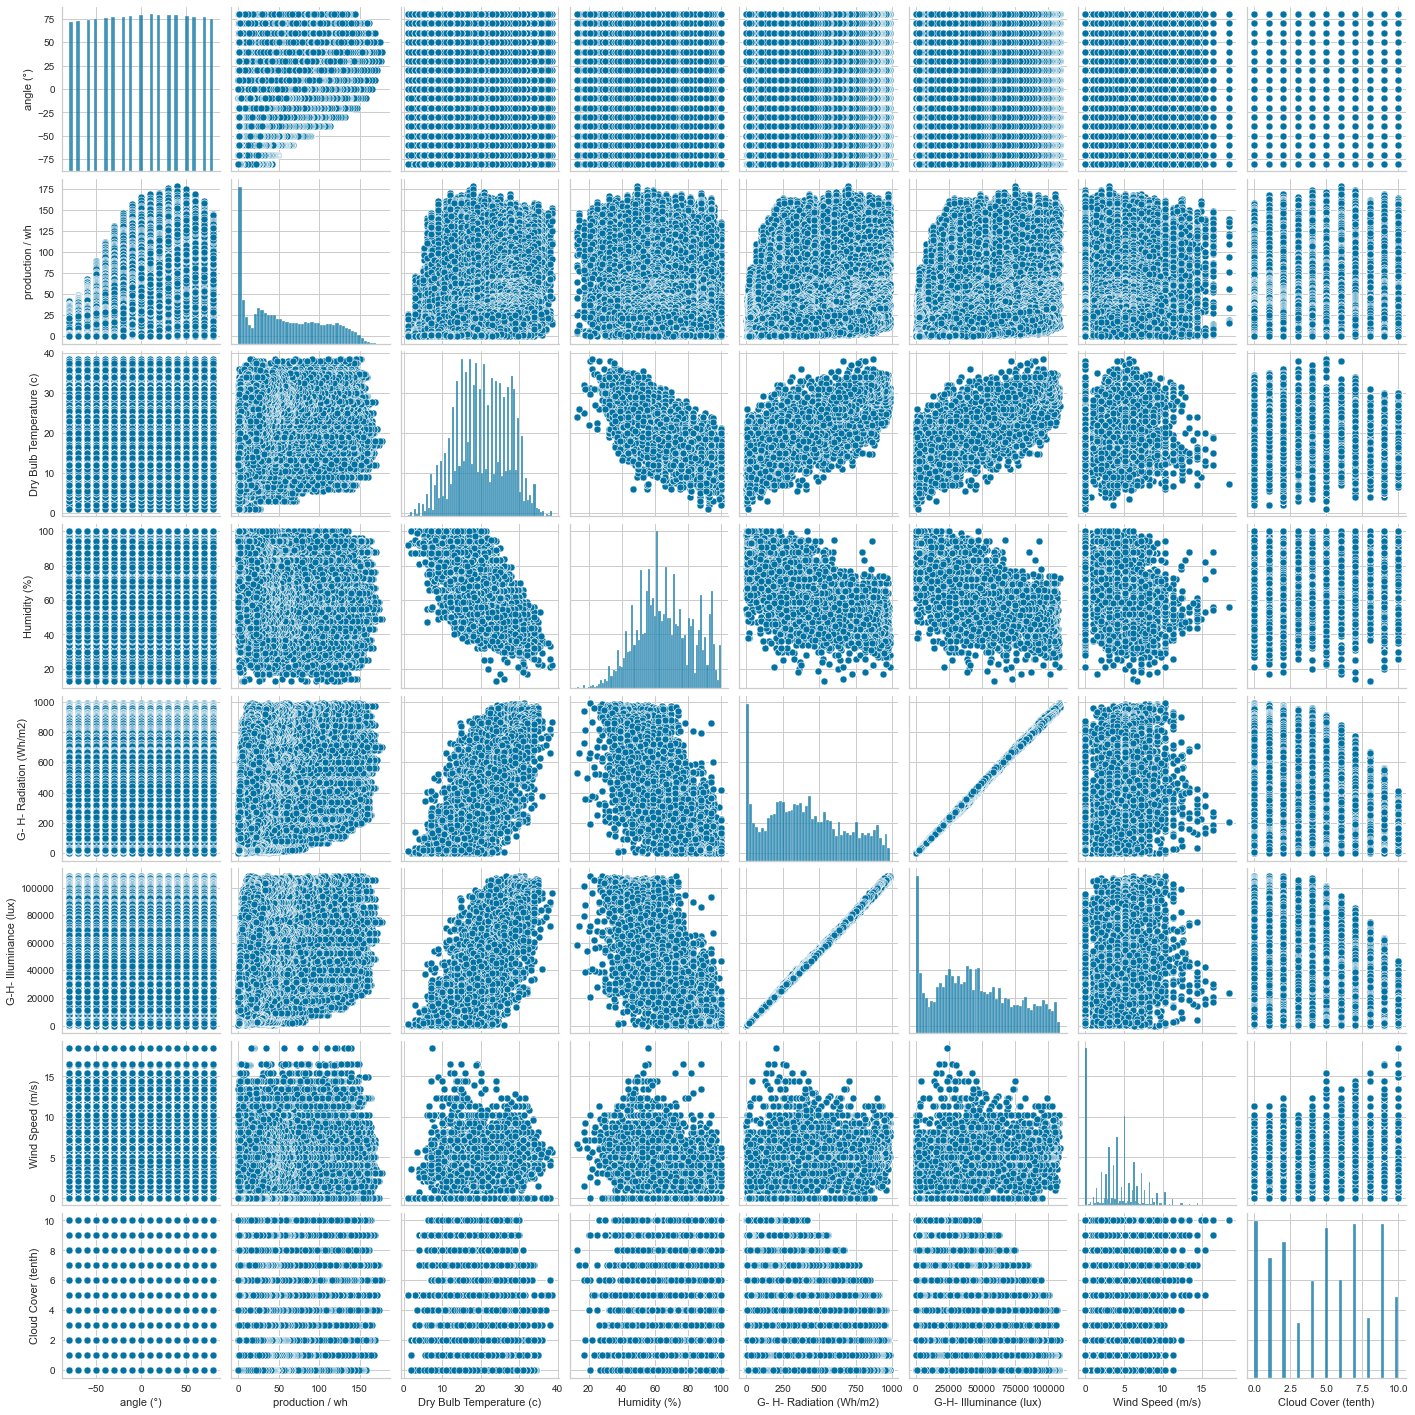

In [76]:
sns.pairplot(panelPV_data[['angle (°)','production / wh','Dry Bulb Temperature (c)','Humidity (%)', 'G- H- Radiation (Wh/m2)', 'G-H- Illuminance (lux)','Wind Speed (m/s)',"Cloud Cover (tenth)"]])

In [77]:
panelPV_data.columns

Index(['Houre', 'Day', 'Month', 'saison', 'angle (°)', 'production / wh',
       'Dry Bulb Temperature (c)', 'Humidity (%)', 'Wind Direction (°)',
       'Cloud Cover (tenth)', 'D- N-Radiation (Wh/m2)',
       'Dif- H- Radiation ( Wh/m2)', 'G- H- Radiation (Wh/m2)',
       'H-I- Radiation Intensity (Wh/m2)', 'G-H- Illuminance (lux)',
       'D-H- Illuminance (lux)', 'D- N- Illuminance (lux)',
       'Wind Speed (m/s)'],
      dtype='object')

In [78]:
reg = setup(data = panelPV_data, target ='production / wh',
            numeric_imputation = 'mean',
            ignore_features = ['Houre', 'Day', 'Month', 'saison'],
            normalize = True,
            silent = True)

In [79]:
compare_models()

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=8657, verbose=0, warm_start=False)

In [80]:
# creating extra tree models

In [81]:
et = create_model('et')

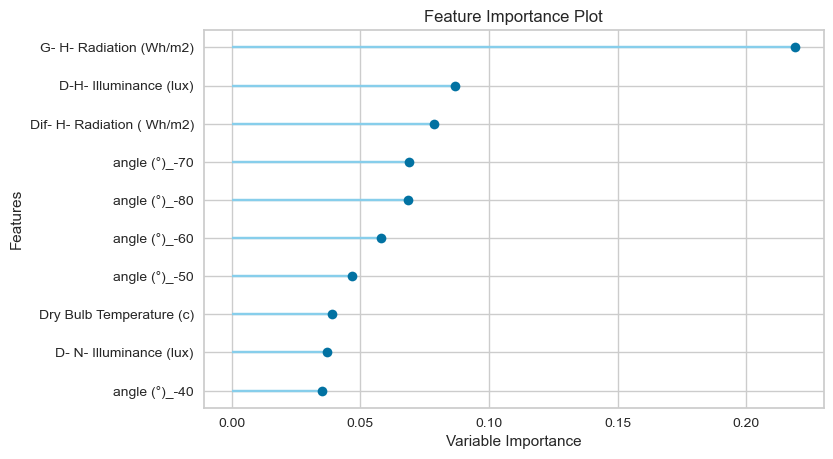

In [82]:
plot_model(estimator = et, plot = 'feature')